In [1]:
import pandas as pd

In [6]:
#to load data
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.shape

(200, 5)

In [14]:
print('This dataset contains ',df.shape[0],'rows')
print('This dataset contains ',df.shape[1],'columns')

This dataset contains  200 rows
This dataset contains  5 columns


In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
#to check missing Values
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
#to handle Missing Values
df.fillna(method='ffill', inplace=True)

<ipython-input-9-906f7f288987>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [15]:
missing_df =df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(df.shape[0]-missing_df['Missing Values Count'])/df.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,CustomerID,0,100.0
1,Gender,0,100.0
2,Age,0,100.0
3,Annual Income (k$),0,100.0
4,Spending Score (1-100),0,100.0


In [25]:
#to remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [33]:
#to ensure numerical types are correct
if 'age' in df.columns:
    df['age'] = df['age'].astype(int)

In [26]:
#to standardize text columns
df['Gender'] = df['Gender'].str.strip().str.capitalize()

In [28]:
#to rename coloumns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [29]:
#check and convert data types
df.dtypes

,0
customerid,int64
gender,object
age,int64
annual_income_(k$),int64
spending_score_(1-100),int64


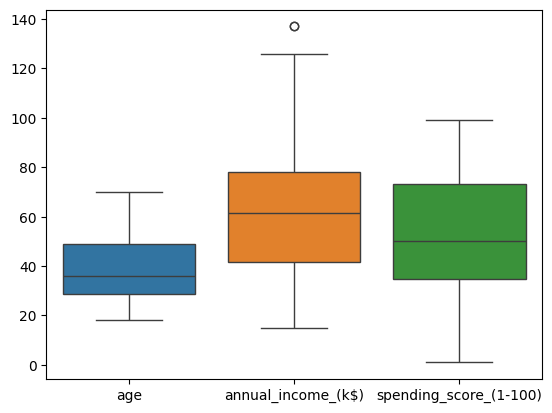

In [30]:
#to check for outliers(Optional)
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df[['age', 'annual_income_(k$)', 'spending_score_(1-100)']])
plt.show()

In [34]:
#to save the cleaned dataset
df.to_csv('Mall_Customers_Cleaned.csv', index=False)

In [32]:
df.head(10)

,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72
